In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [122]:
cc09 = pd.read_csv('City Council/2009_November Municipal (General) City Council At Large Results.csv')
cc19 = pd.read_csv('City Council/2019_November Municipal (General) City Council At Large Results.csv')
m09 = pd.read_csv('Mayoral Election/2009_November Municipal (General) Mayoral Results.csv')
m17 = pd.read_csv('Mayoral Election/2017_November Municipal (General) Mayoral Results.csv')

df = pd.DataFrame(columns=['Ward/Precinct', 'CC Ballots 2009', 'CC Ballots 2019',
                           'M Ballots 2009', 'M Ballots 2017', 'CVAP 2009', 'CVAP 2017', 'CVAP 2019', 
                           'CC Voter Turnout 2009', 'CC Voter Turnout 2019', 'M Voter Turnout 2009', 
                           'M Voter Turnout 2017', 'CC % Net Change','M % Net Change', 'CC Net Change', 
                           'M Net Change', 'Neighborhood'])
df['Ward/Precinct'] = cc09['Ward/Precinct']
df['CC Ballots 2009'] = cc09['BALLOTS CAST']
df['CC Ballots 2019'] = cc19['BALLOTS CAST']
df['M Ballots 2009'] = m09['BALLOTS CAST']
df['M Ballots 2017'] = m17['BALLOTS CAST']

for i in range(len(df)):
    df.loc[i, 'CC Voter Turnout 2009'] = round(cc09.loc[i, 'BALLOTS CAST']/cc09.loc[i, 'CVAP'],2)
    df.loc[i, 'CC Voter Turnout 2019'] = round(cc19.loc[i, 'BALLOTS CAST']/cc19.loc[i, 'CVAP'],2)
    df.loc[i, 'M Voter Turnout 2009'] = round(m09.loc[i, 'BALLOTS CAST']/m09.loc[i, 'CVAP'],2)
    df.loc[i, 'M Voter Turnout 2017'] = round(m17.loc[i, 'BALLOTS CAST']/m17.loc[i, 'CVAP'],2)
    df.loc[i, 'CVAP 2009'] = cc09.loc[i, 'CVAP']
    df.loc[i, 'CVAP 2017'] = m17.loc[i, 'CVAP']
    df.loc[i, 'CVAP 2019'] = cc19.loc[i, 'CVAP']
    df.loc[i, 'CC % Net Change'] = df.loc[i, 'CC Voter Turnout 2019'] - df.loc[i, 'CC Voter Turnout 2009']
    df.loc[i, 'M % Net Change'] = df.loc[i, 'M Voter Turnout 2017'] - df.loc[i, 'M Voter Turnout 2009']
    df.loc[i, 'CC Net Change'] = df.loc[i, 'CC Ballots 2019'] - df.loc[i, 'CC Ballots 2009']
    df.loc[i, 'M Net Change'] = df.loc[i, 'M Ballots 2017'] - df.loc[i, 'M Ballots 2009']
    df.loc[i, 'Ward/Precinct'] = str(df.loc[i, 'Ward/Precinct'])
    if len(df.loc[i, 'Ward/Precinct']) == 3:
        df.loc[i, 'Ward/Precinct'] = '0' + df.loc[i, 'Ward/Precinct']

In [123]:
neighbs = pd.read_csv('WardPrecinct_Matched_To_Neighborhood.csv').drop('Unnamed: 0', axis=1)
props = pd.read_csv('Neighborhood_Make_Up_Of_Precincts.csv').drop('Unnamed: 0', axis=1)
neighbs['%'] = np.zeros(len(neighbs))

for i in range(len(neighbs)):
    wp = neighbs.loc[i, 'WARD_PRECI']
    filt = neighbs['WARD_PRECI'] == wp
    inds = neighbs.index[filt].tolist()
    for n in inds:
        neighb = neighbs.loc[n, 'NEIGHBORHOOD']
        temp = props[['WARD_PRECI', neighb]]
        filt2 = temp['WARD_PRECI'] == wp
        neighbs.loc[n, '%'] = round(temp[filt2].reset_index(drop=False).loc[0, neighb],4)

In [124]:
for i in range(len(df)):
    wp = df.loc[i, 'Ward/Precinct']
    filt = neighbs['WARD_PRECI'] == wp
    temp = neighbs[filt].sort_values(by=['%']).reset_index(drop=False)
    df.loc[i, 'Neighborhood'] = temp.loc[0, 'NEIGHBORHOOD']
df

,Ward/Precinct,CC Ballots 2009,CC Ballots 2019,M Ballots 2009,M Ballots 2017,CVAP 2009,CVAP 2017,CVAP 2019,CC Voter Turnout 2009,CC Voter Turnout 2019,M Voter Turnout 2009,M Voter Turnout 2017,CC % Net Change,M % Net Change,CC Net Change,M Net Change,Neighborhood
0,0101,397,280,397,495.0,534.0,889.0,889.0,0.74,0.31,0.74,0.56,-0.43,-0.18,-117,98.0,East Boston
1,0102,273,147,273,298.0,814.0,1286.0,1286.0,0.34,0.11,0.34,0.23,-0.23,-0.11,-126,25.0,East Boston
2,0103,600,374,600,711.0,1422.0,1908.0,1908.0,0.42,0.2,0.42,0.37,-0.22,-0.05,-226,111.0,East Boston
3,0104,183,125,183,230.0,537.0,1015.0,1015.0,0.34,0.12,0.34,0.23,-0.22,-0.11,-58,47.0,East Boston
4,0105,286,133,286,355.0,980.0,1169.0,1169.0,0.29,0.11,0.29,0.3,-0.18,0.01,-153,69.0,East Boston
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,2209,304,278,304,284.0,1190.0,1185.0,1185.0,0.26,0.23,0.26,0.24,-0.03,-0.02,-26,-20.0,Brighton
250,2210,470,344,470,391.0,1655.0,1904.0,1904.0,0.28,0.18,0.28,0.21,-0.1,-0.07,-126,-79.0,Brighton
251,2211,316,249,316,265.0,1730.0,2046.0,2046.0,0.18,0.12,0.18,0.13,-0.06,-0.05,-67,-51.0,Brighton
252,2212,372,282,372,284.0,1604.0,2052.0,2052.0,0.23,0.14,0.23,0.14,-0.09,-0.09,-90,-88.0,Brighton


In [125]:
df.to_csv('Voter_Turnout_Net_Change_Data.csv')

In [109]:
neighbs

,WARD_PRECI,NEIGHBORHOOD,%
0,1814,Roslindale,0.0005
1,1814,Hyde Park,0.9995
2,1822,Roslindale,0.2581
3,1822,Hyde Park,0.7419
4,1811,Roslindale,0.3590
...,...,...,...
399,0605,South Boston,0.9521
400,2105,Allston,0.9968
401,2103,Allston,0.9815
402,2104,Allston,1.0000


Text(0, 0.5, '% Net Change')

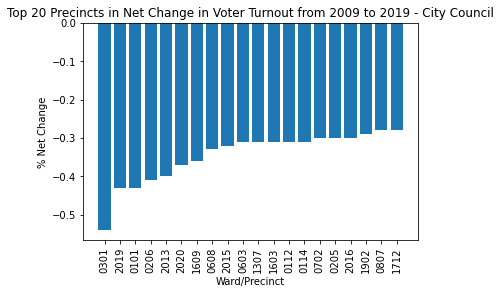

In [126]:
temp = df.sort_values(by=['CC % Net Change']).head(20).reset_index(drop=False)
plt.bar(temp['Ward/Precinct'],temp['CC % Net Change'])
plt.xticks(rotation=90)
plt.title('Top 20 Precincts in Net Change in Voter Turnout from 2009 to 2019 - City Council')
plt.xlabel('Ward/Precinct')
plt.ylabel('% Net Change')

Text(0, 0.5, '% Net Change')

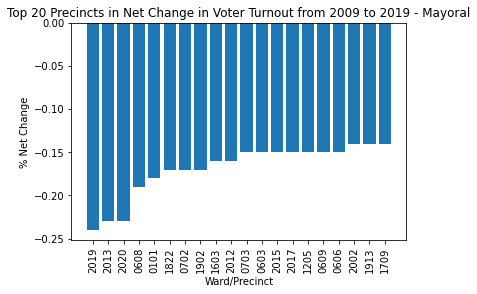

In [127]:
temp1 = df.sort_values(by=['M % Net Change']).head(20).reset_index(drop=False)
plt.bar(temp1['Ward/Precinct'],temp1['M % Net Change'])
plt.xticks(rotation=90)
plt.title('Top 20 Precincts in Net Change in Voter Turnout from 2009 to 2019 - Mayoral')
plt.xlabel('Ward/Precinct')
plt.ylabel('% Net Change')

In [117]:
overlap = []
for i in range(len(temp)):
    if temp.loc[i, 'Ward/Precinct'] in temp1['Ward/Precinct'].tolist():
        overlap.append(temp.loc[i, 'Ward/Precinct'])
#overlap

In [120]:
check = pd.DataFrame(columns=['Ward/Precinct', 'Neighborhood'])

for p in overlap:
    filt = neighbs['WARD_PRECI'] == p
    #display(neighbs[filt])

In [121]:
check['Ward/Precinct'] = overlap
for i in range(len(overlap)):
    filt = neighbs['WARD_PRECI'] == str(overlap[i])
    if len(str(overlap[i])) == 3:
        filt = neighbs['WARD_PRECI'] == '0' + str(overlap[i])
    temp = neighbs[filt].sort_values(by='%').reset_index(drop=False)
    check.loc[i, 'Neighborhood'] = temp.loc[0, 'NEIGHBORHOOD']

check = check.sort_values(by='Neighborhood')
check

,Ward/Precinct,Neighborhood
7,1603,Dorchester
1,0101,East Boston
4,0608,South Boston
6,0603,South Boston
8,0702,South Boston
0,2019,West Roxbury
2,2013,West Roxbury
3,2020,West Roxbury
5,2015,West Roxbury
9,1902,West Roxbury
